In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from descriptive_tables import *
import missingno as msno


In [4]:
output_path="C:/Users/orlyk/readmissions/project/descriptives/vital_signs/"
output_figures="C:/Users/orlyk/readmissions/project/descriptives/vital_signs/figures/"

In [5]:
df=pd.read_pickle(r"C:\Users\orlyk\readmissions\project\preprocessed\vital_signs\VS_for_model\vs_processed.pkl")
df_pop=pd.read_pickle(r"C:\Users\orlyk\readmissions\project\preprocessed\population\population_for_model\df_basic_data.pkl")

l_casenum=df_pop[["CaseNum","year"]]

df_miss=pd.merge(l_casenum,df,on="CaseNum",how="left")

df_miss=df_miss.sort_values(by='year_x', ascending=False)

# Missing values

In [6]:
df_last=df_miss[['CaseNum', 'result_last_HR', 
       'result_last_sys_BP', 'result_last_dias_BP', 
       'result_last_TMP',  'result_last_SATUR',
        'year_x' ]]



df_last=df_last.rename(columns={"result_last_HR": "pulse", "result_last_sys_BP": "systolic_BP", 
                                "result_last_dias_BP": "diastolic_BP",
                               'result_last_TMP':'temperature','result_last_SATUR':"saturation",
                               'year_x':'year'}, errors="raise")

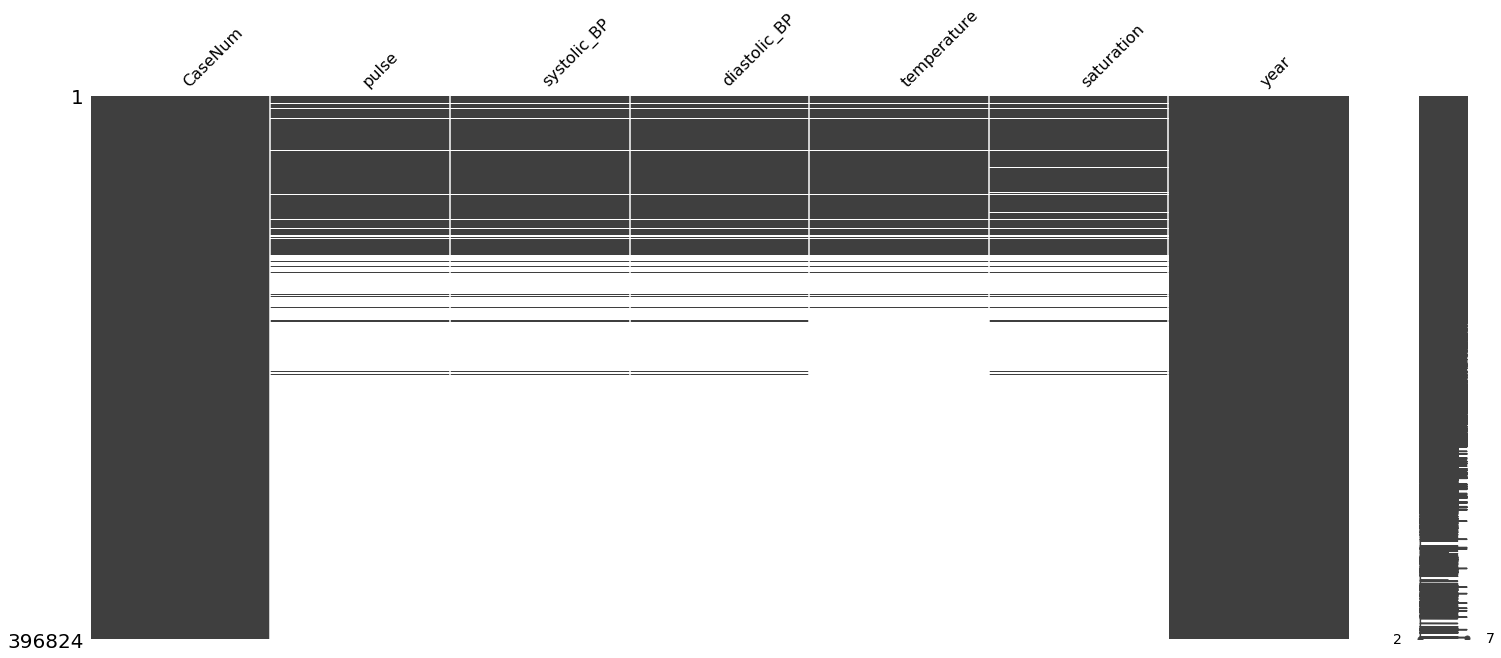

In [7]:
msno.matrix(df_last)


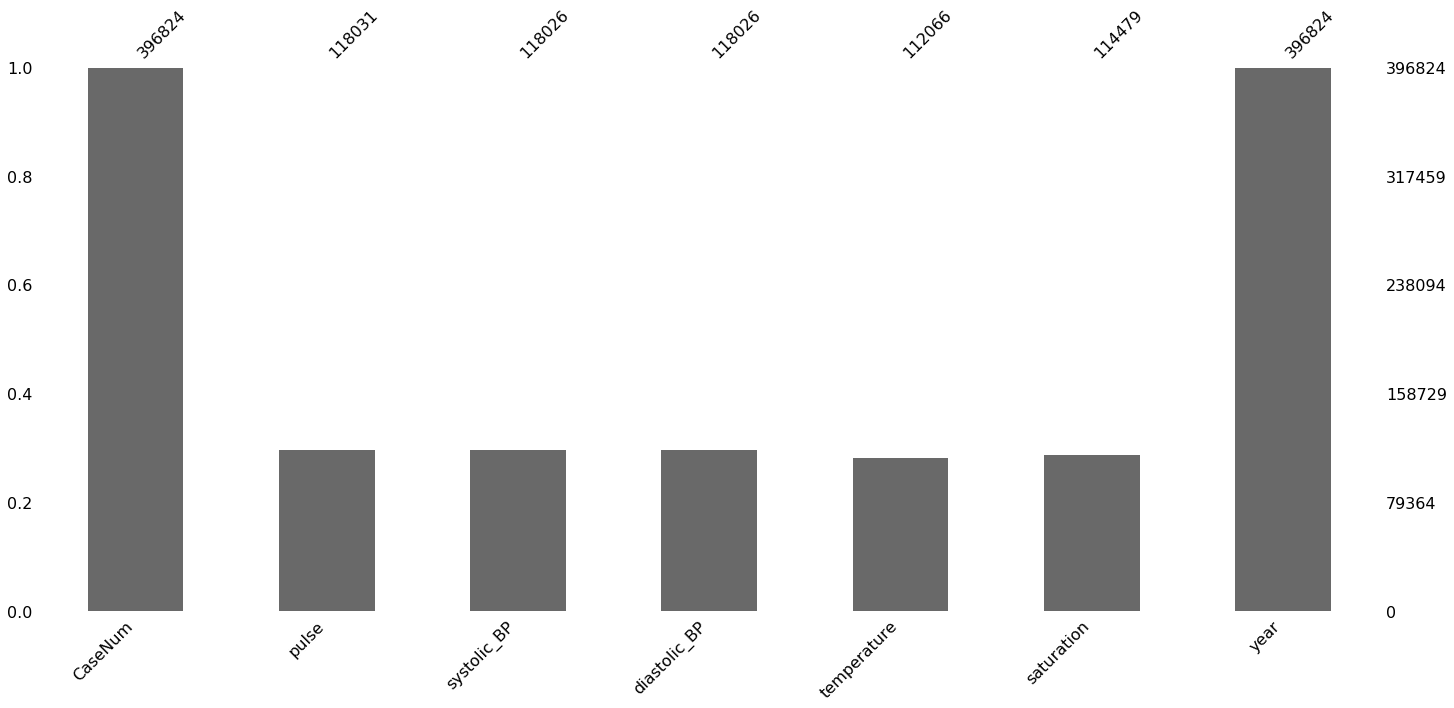

In [8]:
msno.bar(df_last)


In [9]:
df_year=df.groupby('year').count()
df_year=df_year["result_max_sys_BP"]
print(df_year)

year
2011.0      182
2012.0      202
2013.0      988
2014.0     1730
2015.0     1749
2016.0     5932
2017.0    43058
2018.0    44603
2019.0    22320
Name: result_max_sys_BP, dtype: int64


# Distributions

In [10]:
l_label=df_pop[['CaseNum','LABEL_HOSP','LABEL_JUST_ER']]
df=pd.merge(df,l_label,on="CaseNum",how="left")
print()

In [11]:
df["LABEL_HOSP"]=np.where(df["LABEL_HOSP"]==1,"readmission","no_readmission")
df["LABEL_JUST_ER"]=np.where(df["LABEL_JUST_ER"]==1,"readmission","no_readmission")

In [12]:
df_max_vars=df[['CaseNum', 'result_max_HR', 
       'result_max_sys_BP', 'result_max_dias_BP', 
       'result_max_TMP',  'result_max_SATUR','LABEL_HOSP','LABEL_JUST_ER'
       ]]



df_max_vars=df_max_vars.rename(columns={"result_max_HR": "max_pulse", "result_max_sys_BP": "max_systolic_BP", 
                                "result_max_dias_BP": "max_diastolic_BP",
                               'result_max_TMP':'max_temprature','result_max_SATUR':"max_saturation"
                               }, errors="raise")


df_min_vars=df[['CaseNum', 'result_min_HR', 
       'result_min_sys_BP', 'result_min_dias_BP', 
       'result_min_TMP',  'result_min_SATUR','LABEL_HOSP','LABEL_JUST_ER'
       ]]



df_min_vars=df_min_vars.rename(columns={"result_min_HR": "min_pulse", "result_min_sys_BP": "min_systolic_BP", 
                                "result_min_dias_BP": "min_diastolic_BP",
                               'result_min_TMP':'min_temprature','result_min_SATUR':"min_saturation"
                               }, errors="raise")


df_max_vars["max_pulse"]=pd.to_numeric(df_max_vars["max_pulse"], errors='ignore')
df_max_vars["max_systolic_BP"]=pd.to_numeric(df_max_vars["max_systolic_BP"], errors='ignore')
df_max_vars["max_diastolic_BP"]=pd.to_numeric(df_max_vars["max_diastolic_BP"], errors='ignore')
df_max_vars["max_temprature"]=pd.to_numeric(df_max_vars["max_temprature"], errors='ignore')
df_max_vars["max_saturation"]=pd.to_numeric(df_max_vars["max_saturation"], errors='ignore')


df_min_vars["min_pulse"]=pd.to_numeric(df_min_vars["min_pulse"], errors='ignore')
df_min_vars["min_systolic_BP"]=pd.to_numeric(df_min_vars["min_systolic_BP"], errors='ignore')
df_min_vars["min_diastolic_BP"]=pd.to_numeric(df_min_vars["min_diastolic_BP"], errors='ignore')
df_min_vars["min_temprature"]=pd.to_numeric(df_min_vars["min_temprature"], errors='ignore')
df_min_vars["min_saturation"]=pd.to_numeric(df_min_vars["min_saturation"], errors='ignore')


In [13]:
df_1_max=df_max_vars[df_max_vars["LABEL_HOSP"]=="readmission"]
df_0_max=df_max_vars[df_max_vars["LABEL_HOSP"]=="no_readmission"]

df_1_ER_max=df_max_vars[df_max_vars["LABEL_JUST_ER"]=="readmission"]
df_0_ER_max=df_max_vars[df_max_vars["LABEL_JUST_ER"]=="no_readmission"]

df_1_min=df_min_vars[df_min_vars["LABEL_HOSP"]=="readmission"]
df_0_min=df_min_vars[df_min_vars["LABEL_HOSP"]=="no_readmission"]

df_1_ER_min=df_min_vars[df_min_vars["LABEL_JUST_ER"]=="readmission"]
df_0_ER_min=df_min_vars[df_min_vars["LABEL_JUST_ER"]=="no_readmission"]

In [14]:
def boxplots_vs(df,var):
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df["LABEL_HOSP"], y=df[var], color="gray",width=0.5)
    plt.title(var+" - readmission: hospitalized", fontdict=None, loc='center')
    plt.figure()
    plt.savefig(output_figures+var+"_HOSP_boxplot.png")

    plt.figure(figsize=(7,4))
    sns.boxplot(x=df["LABEL_JUST_ER"], y=df[var], color="gray",width=0.5)
    plt.title(var+" - readmission: ER", fontdict=None, loc='center')
    plt.savefig(output_figures+var+"_ER_boxplot.png")
    plt.show()
    
def dist_vs (df_1,df_0,df_1_ER,df_0_ER,var):
    ax=sns.distplot(df_1[var],kde=True,bins=30,label="readmission")
    ax=sns.distplot(df_0[var],kde=True,bins=30,label="no_readmission")
    #ax.set(xlim=(18, 100))
    plt.ylabel ("N")
    plt.xlabel (var)
    plt.title(var+"_distribution - readmission: hospitalized", fontdict=None, loc='center')
    ax.legend()
    plt.savefig(output_figures+var+"_HOSP_dist.png")
    plt.figure()
    
    ax=sns.distplot(df_1_ER[var],kde=True,bins=30,label="readmission")
    ax=sns.distplot(df_0_ER[var],kde=True,bins=30,label="no_readmission")
    #ax.set(xlim=(18, 100))
    plt.ylabel ("N")
    plt.xlabel (var)
    plt.title(var+"_distribution - readmission: ER", fontdict=None, loc='center')
    ax.legend()
    plt.savefig(output_figures+var+"_ER_dist.png")
    plt.figure()
    
    
       


# max values

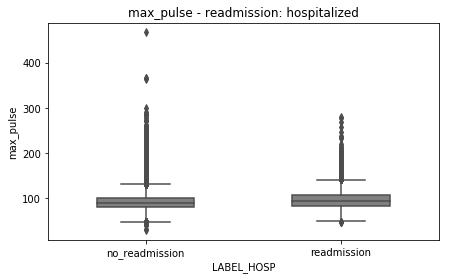

<Figure size 432x288 with 0 Axes>

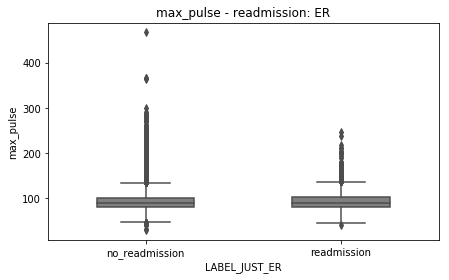

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


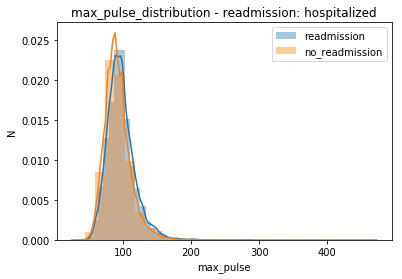

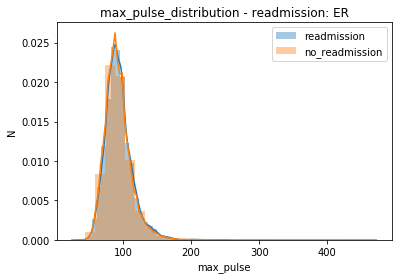

<Figure size 432x288 with 0 Axes>

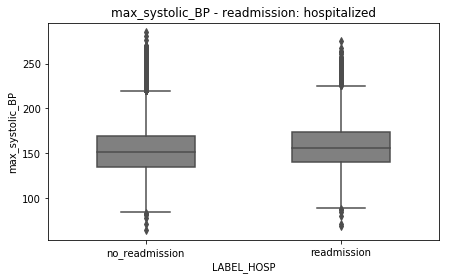

<Figure size 432x288 with 0 Axes>

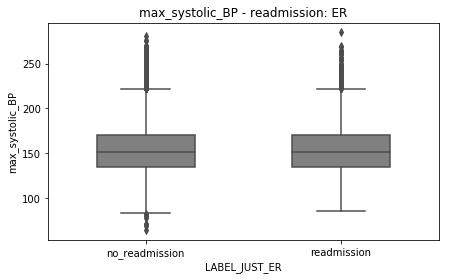

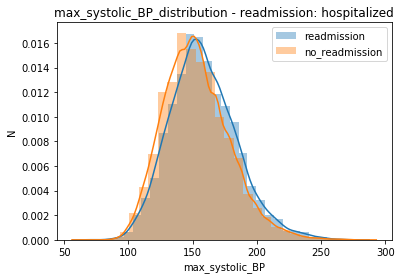

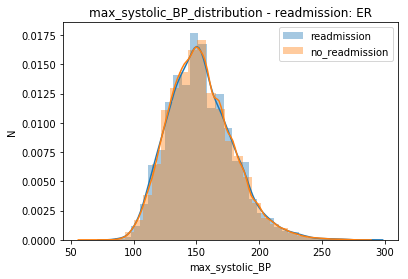

<Figure size 432x288 with 0 Axes>

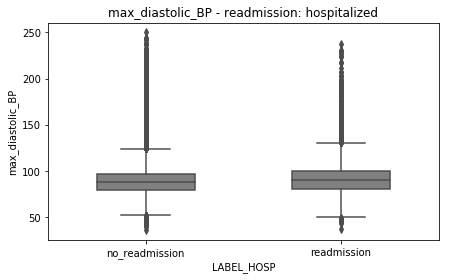

<Figure size 432x288 with 0 Axes>

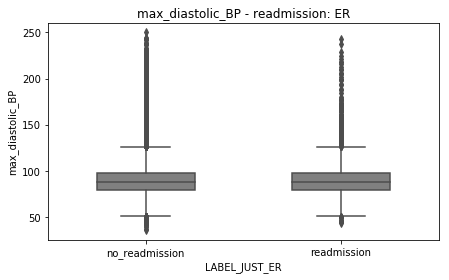

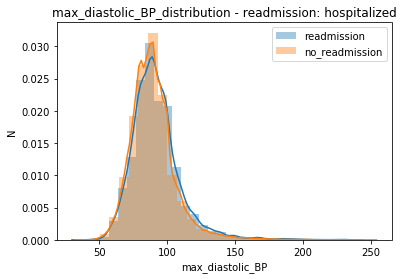

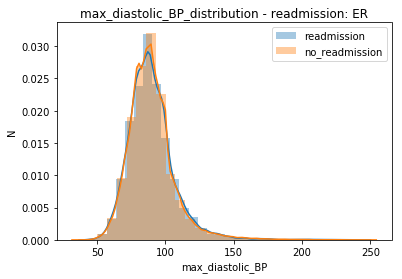

<Figure size 432x288 with 0 Axes>

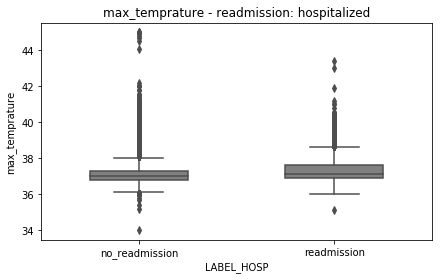

<Figure size 432x288 with 0 Axes>

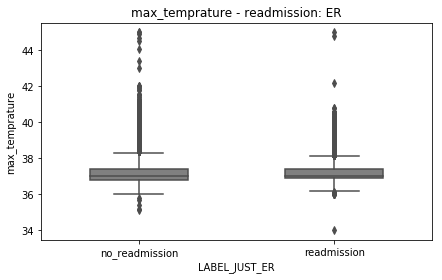

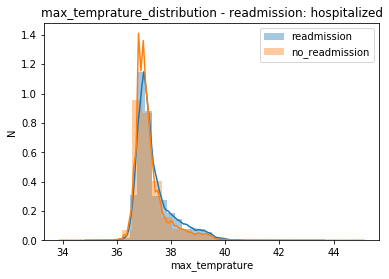

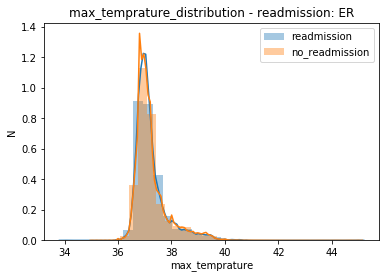

<Figure size 432x288 with 0 Axes>

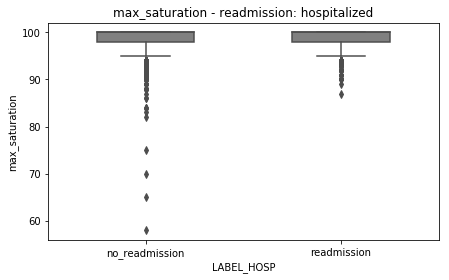

<Figure size 432x288 with 0 Axes>

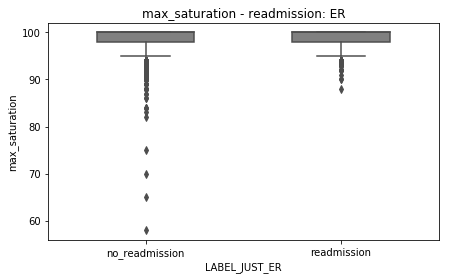

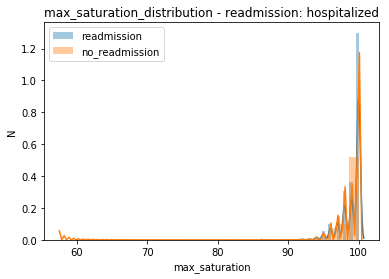

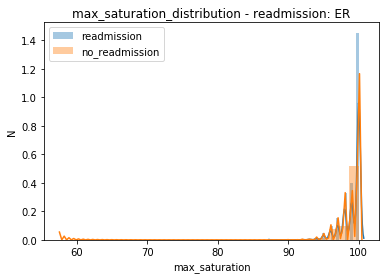

<Figure size 432x288 with 0 Axes>

In [15]:
boxplots_vs(df_max_vars,"max_pulse")
dist_vs(df_1_max,df_0_max,df_1_ER_max,df_0_ER_max,"max_pulse")

boxplots_vs(df_max_vars,"max_systolic_BP")
dist_vs(df_1_max,df_0_max,df_1_ER_max,df_0_ER_max,"max_systolic_BP")

boxplots_vs(df_max_vars,"max_diastolic_BP")
dist_vs(df_1_max,df_0_max,df_1_ER_max,df_0_ER_max,"max_diastolic_BP")

boxplots_vs(df_max_vars,"max_temprature")
dist_vs(df_1_max,df_0_max,df_1_ER_max,df_0_ER_max,"max_temprature")

boxplots_vs(df_max_vars,"max_saturation")
dist_vs(df_1_max,df_0_max,df_1_ER_max,df_0_ER_max,"max_saturation")



# Min values

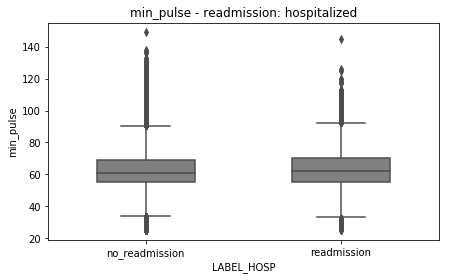

<Figure size 432x288 with 0 Axes>

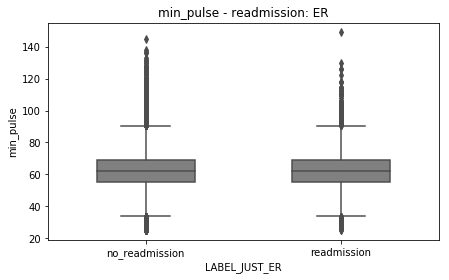

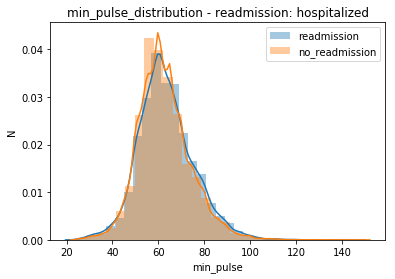

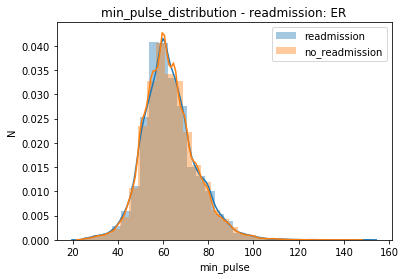

<Figure size 432x288 with 0 Axes>

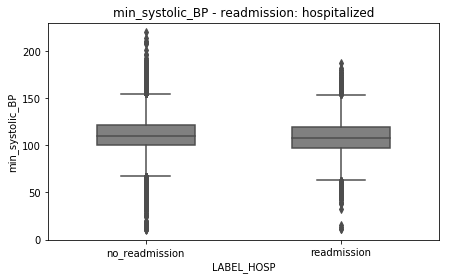

<Figure size 432x288 with 0 Axes>

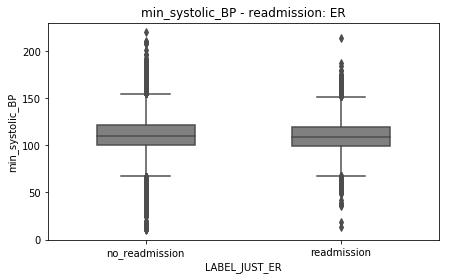

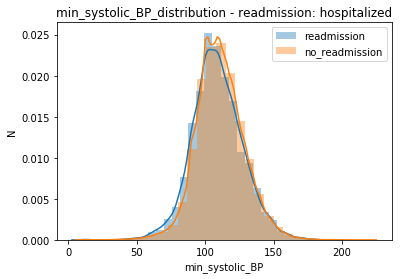

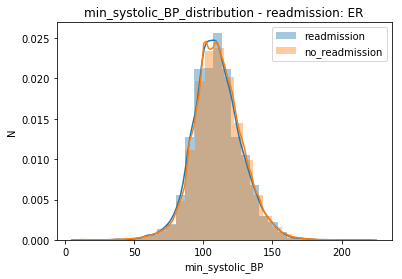

<Figure size 432x288 with 0 Axes>

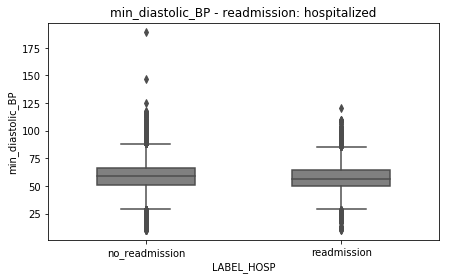

<Figure size 432x288 with 0 Axes>

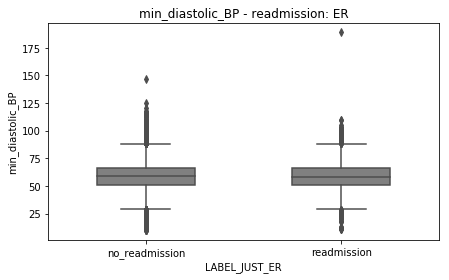

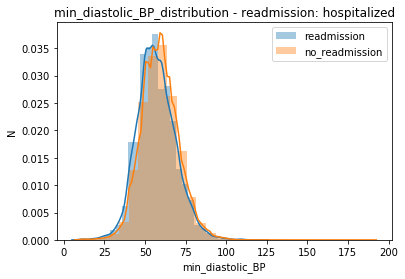

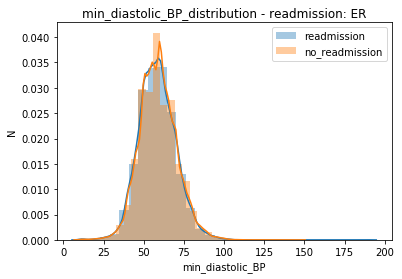

<Figure size 432x288 with 0 Axes>

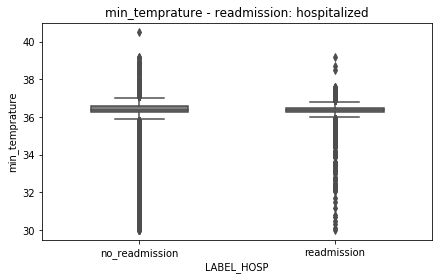

<Figure size 432x288 with 0 Axes>

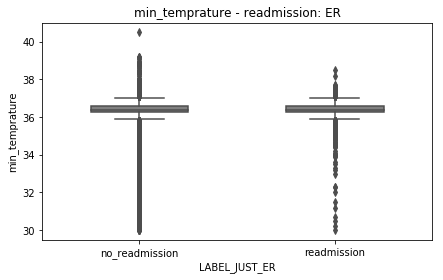

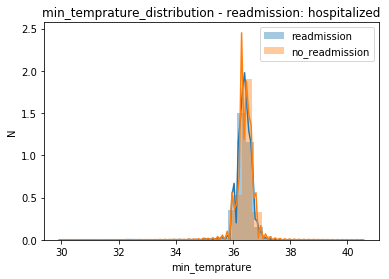

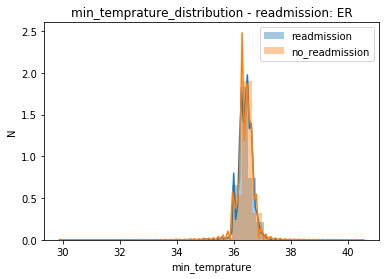

<Figure size 432x288 with 0 Axes>

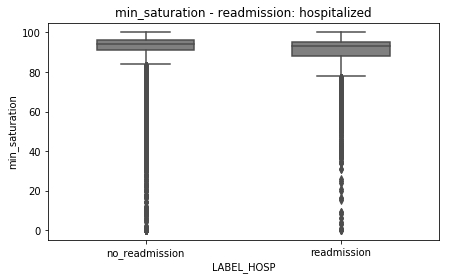

<Figure size 432x288 with 0 Axes>

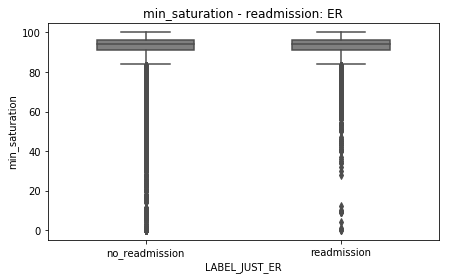

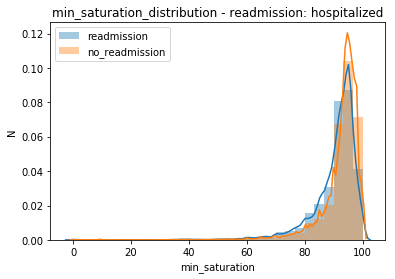

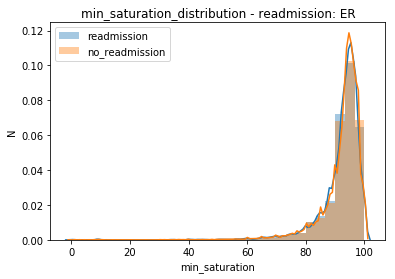

<Figure size 432x288 with 0 Axes>

In [16]:
boxplots_vs(df_min_vars,"min_pulse")
dist_vs(df_1_min,df_0_min,df_1_ER_min,df_0_ER_min,"min_pulse")

boxplots_vs(df_min_vars,"min_systolic_BP")
dist_vs(df_1_min,df_0_min,df_1_ER_min,df_0_ER_min,"min_systolic_BP")

boxplots_vs(df_min_vars,"min_diastolic_BP")
dist_vs(df_1_min,df_0_min,df_1_ER_min,df_0_ER_min,"min_diastolic_BP")

boxplots_vs(df_min_vars,"min_temprature")
dist_vs(df_1_min,df_0_min,df_1_ER_min,df_0_ER_min,"min_temprature")

boxplots_vs(df_min_vars,"min_saturation")
dist_vs(df_1_min,df_0_min,df_1_ER_min,df_0_ER_min,"min_saturation")

In [18]:
df_1=df[df["LABEL_HOSP"]=="readmission"]
df_0=df[df["LABEL_HOSP"]=="no_readmission"]

df_1_ER=df[df["LABEL_JUST_ER"]=="readmission"]
df_0_ER=df[df["LABEL_JUST_ER"]=="no_readmission"]

describe_table_all=df.describe()
describe_table_HOSP_readmission=df_1.describe()
describe_table_HOSP_no_readmission=df_0.describe()
describe_table_ER_readmission=df_1_ER.describe()
describe_table_ER_no_readmission=df_0_ER.describe()


describe_table_all.to_csv(output_path+"VS_descriptives.csv")
describe_table_HOSP_readmission.to_csv(output_path+"VS_HOSP_read_descriptives.csv")
describe_table_HOSP_no_readmission.to_csv(output_path+"VS_HOSP_no_read_descriptives.csv")
describe_table_ER_readmission.to_csv(output_path+"VS_ER_read_descriptives.csv")
describe_table_ER_no_readmission.to_csv(output_path+"VS_ER_no_read_descriptives.csv")